In [26]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [146]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n\n'

In [ ]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [175]:
md_data = pd.read_csv("glic_gating.csv")

In [176]:
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MD_name', 'pH', 'replicate', 'traj_time',
       'rmsd', 'ecd_pc1', 'tmd_pc1', 'domain twist', 'min hole radius',
       'system', 'wholepca_pc1', 'wholepca_pc2', 'rmsf', 'ecd_pc2', 'tmd_pc2'],
      dtype='object')

In [161]:
md_data

,Unnamed: 0,Unnamed: 0.1,MD_name,pH,replicate,traj_time,rmsd,ecd_pc1,tmd_pc1,domain twist,min hole radius,system,wholepca_pc1,wholepca_pc2,rmsf,ecd_pc2,tmd_pc2
0,0,0,5NJY,70,1,0,0.000000,-0.450258,3.279069,11.755106,0.83748,0,0.717673,3.350286,"[ 0.3902517 0.316796 0.20989354 ..., 0.1...",0.357732,-1.119838
1,1,1,5NJY,70,1,1,1.727738,0.894403,3.166664,9.105226,0.73840,0,0.630748,4.148447,"[ 0.28054386 0.26561692 0.20901562 ..., 0.0...",2.561647,-1.134746
2,2,2,5NJY,70,1,2,2.020854,2.341526,2.749989,9.638441,1.29015,0,1.855654,3.210543,"[ 0.07622263 0.07348195 0.09509178 ..., 0.1...",2.918209,-1.380760
3,3,3,5NJY,70,1,3,1.915493,1.985111,3.009500,8.880064,1.41160,0,1.412526,3.407093,"[ 0.1024719 0.16225648 0.18653138 ..., 0.1...",1.983271,-1.233216
4,4,4,5NJY,70,1,4,1.899955,2.116413,3.058160,12.076026,0.94805,0,2.364888,3.248358,"[ 0.14206782 0.08395956 0.09712773 ..., 0.1...",2.501530,-1.161252
5,5,5,5NJY,70,1,5,2.043537,2.543423,2.773529,9.824443,1.44453,0,1.866260,2.947303,"[ 0.14614813 0.17722042 0.21123332 ..., 0.1...",1.713744,-1.081816
6,6,6,5NJY,70,1,6,1.885621,2.745998,2.625010,10.523686,1.52369,0,2.240279,2.618280,"[ 0.16406532 0.16484803 0.1436452 ..., 0.1...",1.789053,-1.059884
7,7,7,5NJY,70,1,7,1.995083,3.198771,2.811840,10.740198,1.42044,0,2.609150,2.053408,"[ 0.19980372 0.12892586 0.07407645 ..., 0.0...",0.104684,-1.109357
8,8,8,5NJY,70,1,8,2.042677,3.669586,2.774023,12.822112,1.04020,0,3.700863,2.066898,"[ 0.16702205 0.19065368 0.19865094 ..., 0.2...",1.607017,-1.246203
9,9,9,5NJY,70,1,9,2.152671,3.925136,3.081735,11.511422,1.72425,0,3.595905,2.555981,"[ 0.10299914 0.15221907 0.15970014 ..., 0.2...",1.711967,-1.297545


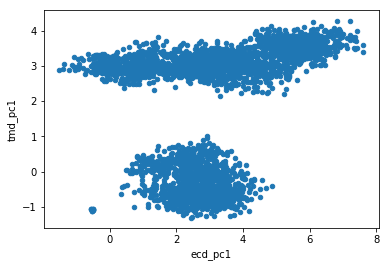

In [149]:
ax = md_data.plot(kind="scatter",x="ecd_pc1",y="tmd_pc1")

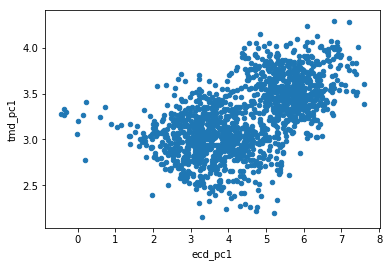

In [163]:
ax = md_data[md_data['pH'] == 70].plot(kind="scatter",x="ecd_pc1",y="tmd_pc1")

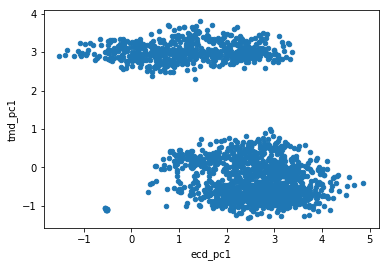

In [162]:
ax = md_data[md_data['pH'] == 46].plot(kind="scatter",x="ecd_pc1",y="tmd_pc1")

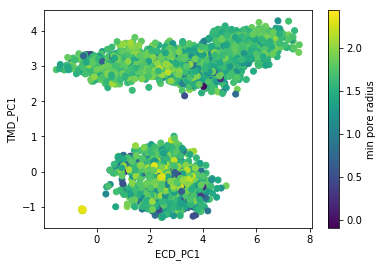

In [174]:
ax = plt.subplot()
plt.scatter(md_data['ecd_pc1'],md_data['tmd_pc1'],c=md_data['min hole radius'])
ax.set_xlabel("ECD_PC1")
ax.set_ylabel("TMD_PC1")
cbar = plt.colorbar()
cbar.set_label("min pore radius")
plt.savefig("poreprofile.png")

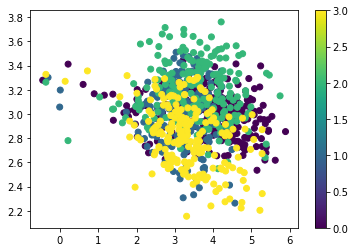

In [177]:
# 5NJY_pH70
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
ax = plt.scatter(md_5NJY_pH70['ecd_pc1'],md_5NJY_pH70['tmd_pc1'],c=md_5NJY_pH70['system'])
cbar = plt.colorbar()

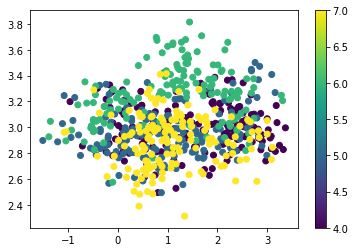

In [178]:
# 5NJY_pH46

md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
ax = plt.scatter(md_5NJY_pH46['ecd_pc1'],md_5NJY_pH46['tmd_pc1'],c=md_5NJY_pH46['system'])
cbar = plt.colorbar()


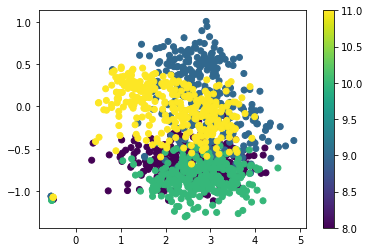

In [179]:
# 4HFI_pH46

md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
ax = plt.scatter(md_4HFI_pH46['ecd_pc1'],md_4HFI_pH46['tmd_pc1'],c=md_4HFI_pH46['system'])
cbar = plt.colorbar()


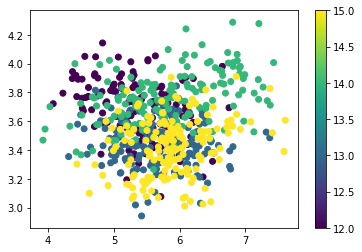

In [180]:
# 4NPQ_pH70
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]
ax = plt.scatter(md_4NPQ_pH70['ecd_pc1'],md_4NPQ_pH70['tmd_pc1'],c=md_4NPQ_pH70['system'])
cbar = plt.colorbar()

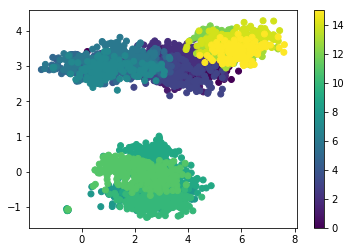

In [182]:
ax = plt.scatter(md_data['ecd_pc1'],md_data['tmd_pc1'],c=md_data['system'])
cbar = plt.colorbar()

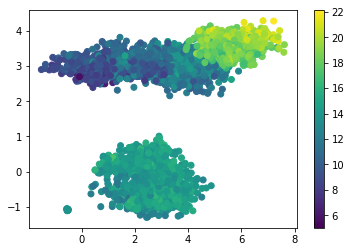

In [183]:
ax = plt.scatter(md_data['ecd_pc1'],md_data['tmd_pc1'],c=md_data['domain twist'])
cbar = plt.colorbar()

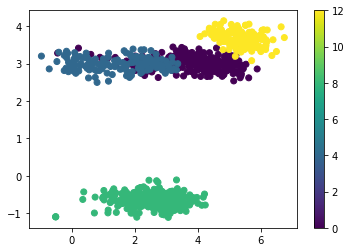

In [136]:
#WT
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
ax = plt.scatter(md_WT['ecd_pc1'],md_WT['tmd_pc1'],c=md_WT['system'])
cbar = plt.colorbar()

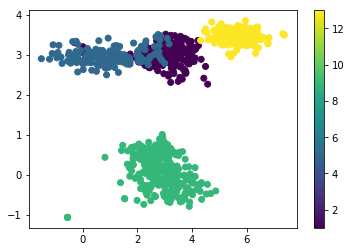

In [138]:
#F238L
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
ax = plt.scatter(md_F238L['ecd_pc1'],md_F238L['tmd_pc1'],c=md_F238L['system'])
cbar = plt.colorbar()

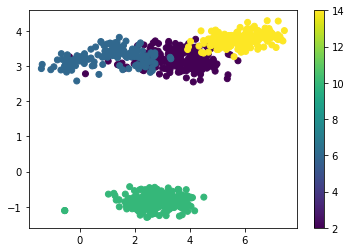

In [139]:
#I233T
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
ax = plt.scatter(md_I233T['ecd_pc1'],md_I233T['tmd_pc1'],c=md_I233T['system'])
cbar = plt.colorbar()

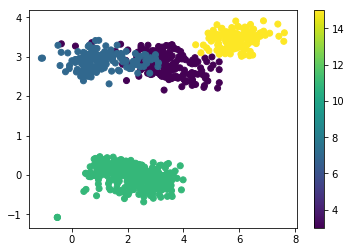

In [140]:
#F238LI233T
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]
ax = plt.scatter(md_F238LI233T['ecd_pc1'],md_F238LI233T['tmd_pc1'],c=md_F238LI233T['system'])
cbar = plt.colorbar()